# Hackathon 1, statistics.

This project illustrates the course LEPL1109. You will study the emission of PM2.5 fine particles in Shanghai and Beijing, measured by US embassy/offices. PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. In other words, it's used as a measure of pollution. 


## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

•	Do not comment your results directly into cells of code. Use instead a Markdown cell. 

•	"Dry" code or results not followed by a minimum of analysis / comments will be penalized.


## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “Hackathons” on Moodle and the subsection “Remise Hackathon 1”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Igor Grégoire

Part. 2:

Part. 3:

Part. 4:

Part. 5:

Part. 6:


# Air quality in China


PM2.5 consists of airborne particles with aerodynamic diameters less than 2.5 μm. They are known to adversely affect human
health. The U.S. Embassy in Beijing started releasing hourly PM2.5 readings in April 2008, followed by the consulates in Guangzhou, Shanghai, Chengdu, and Shenyang in November and December 2011, June 2012, and April 2013, respectively. China’s Ministry of Environmental Protection (MEP) began to report hourly PM2.5 data in 74 cities (which include the five cities with the U.S. diplomatic posts) from January 2013, which was extended to 338 cities in January 2015.

The time period for this data is between Jan 1st, 2010 to Dec 31st, 2015. Missing data are denoted as NA.

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* season: season of data in this row
* PM: PM2.5 concentration (µg/m^3)
* DEWP: Dew Point (Celsius Degree)
* TEMP: Temperature (Celsius Degree)
* HUMI: Humidity (%)
* PRES: Pressure (hPa)
* cbwd: Combined wind direction
* Iws: Cumulated wind speed (m/s)
* precipitation: hourly precipitation (mm)
* Iprec: Cumulated precipitation (mm)

Reference: 

Liang, X., S. Li, S. Zhang, H. Huang, and S. X. Chen (2016), PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities, J. Geophys. Res. Atmos., 121, 10220-10236.


## 1. Basic statistics


------------------------------------------------------------------------------------------------------
1.1. We will focus on PM2.5 hourly measurements done by the US offices between the 1/1/2012 and 31/12/2015 in Beijing and Shanghai. 

a) Load datasets and merge them. Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Shanghai and Beijing (PM_US_Post). Notice that in a later question, you will also need PM2.5 emissions measured in Nongzhanguan.

Use the field 'season' to split the data of Shanghai and Bejing into:
* one sample for winter (season=4), 
* one sample for summer (season=2).
------------------------------------------------------------------------------------------------------

In [279]:
# Code here
import pandas as pd

start_day, start_month, start_year = 1, 1, 2012
end_day, end_month, end_year = 31, 12, 2015
df = pd.read_csv("BeijingPM.csv")
dg = pd.read_csv("ShanghaiPM.csv")

# On retire les données hors de la période temporelle
df = df[(df['year'] >= start_year) & (df['month'] >= start_month) & (df['day'] >= start_day) & (df['year'] <= end_year) & (df['month'] <= end_month) & (df['day'] <= end_day)]
dg = dg[(dg['year'] >= start_year) & (dg['month'] >= start_month) & (dg['day'] >= start_day) & (dg['year'] <= end_year) & (dg['month'] <= end_month) & (dg['day'] <= end_day)]

dfCleanedUS = df.dropna(subset='PM_US Post')
dgCleanedUS = dg.dropna(subset='PM_US Post')

dataB = dfCleanedUS[dfCleanedUS['No'].isin(dgCleanedUS['No'])]
dataS = dgCleanedUS[dgCleanedUS['No'].isin(dfCleanedUS['No'])]

b) Calculate the mean, variance, median, 25% and 75% quantiles of emissions during winter and summer in Shanghai and Beijing. Present them in clean table. Comment your results.

In [280]:
# Code here
import numpy as np
summerB = dataB[dataB['season'] == 2]
summerS = dataS[dataS['season'] == 2]
winterB = dataB[dataB['season'] == 4]
winterS = dataS[dataS['season'] == 4]

sBmean = summerB['PM_US Post'].mean()
sSmean = summerS['PM_US Post'].mean()
wBmean = winterB['PM_US Post'].mean()
wSmean = winterS['PM_US Post'].mean()

sBvar = summerB['PM_US Post'].std() **2
sSvar = summerS['PM_US Post'].std() **2
wBvar = winterB['PM_US Post'].std() **2
wSvar = winterS['PM_US Post'].std() **2

sBq25 = np.percentile(summerB['PM_US Post'], 25)
sSq25 = np.percentile(summerS['PM_US Post'], 25)
wBq25 = np.percentile(winterB['PM_US Post'], 25)
wSq25 = np.percentile(winterS['PM_US Post'], 25)

sBq50 = np.percentile(summerB['PM_US Post'], 50)
sSq50 = np.percentile(summerS['PM_US Post'], 50)
wBq50 = np.percentile(winterB['PM_US Post'], 50)
wSq50 = np.percentile(winterS['PM_US Post'], 50)

sBq75 = np.percentile(summerB['PM_US Post'], 75)
sSq75 = np.percentile(summerS['PM_US Post'], 75)
wBq75 = np.percentile(winterB['PM_US Post'], 75)
wSq75 = np.percentile(winterS['PM_US Post'], 75)

dico = {"mean":[sBmean, sSmean, wBmean, wSmean], "variance":[sBvar, sSvar, wBvar, wSvar], "median":[sBq50, sSq50, wBq50, wSq50], "25%q": [sBq25, sSq25, wBq25, wSq25], "75%q":[sBq75, sSq75, wBq75, wSq75]}

tab1 = pd.DataFrame(dico, index=['Beijin summer', 'Shanghai summer', 'Beijin winter', 'Shanghai winter'])
print(tab1)

                       mean      variance  median  25%q   75%q
Beijin summer     71.840843   2978.227347    59.0  30.0  100.0
Shanghai summer   33.891807    611.481485    29.0  16.0   46.0
Beijin winter    122.404926  15602.260067    82.0  21.0  180.0
Shanghai winter   76.270071   3310.005657    60.0  36.0   99.0


Comments here:

Beijin et Shanghai polluent plus en hiver



-----------------------------------------------------------------------------------------------------------------------

1.2. Draw box plots of PM2.5 emissions in Beijing and Shanghai / summer & winter (in total 4 box plots).

Search on internet, what are the recommended maximum level of PM2.5 and comment your results.

------------------------------------------------------------------------------------------------------------------------



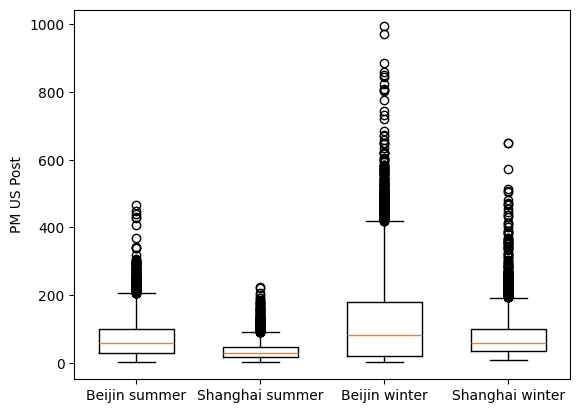

In [281]:
import matplotlib.pyplot as plt

plt.boxplot(summerB['PM_US Post'], positions = [1], widths = 0.6)
plt.boxplot(summerS['PM_US Post'], positions = [2], widths = 0.6)
plt.boxplot(winterB['PM_US Post'], positions = [3], widths = 0.6)
plt.boxplot(winterS['PM_US Post'], positions = [4], widths = 0.6)
plt.gca().xaxis.set_ticklabels(['Beijin summer','Shanghai summer','Beijin winter','Shanghai winter'])
plt.ylabel('PM US Post')
plt.show()


Comments here:


## 2. Fit of distributions 


------------------------------------------------------------------------------------------------------

2.1. Fit a Gamma distribution to PM2.5 emissions in Beijing and Shanghai (winter & summer). Warning, in python, the Gamma distribution has a parameter of location which translate the distribution from $[0,+\infty)$ to $[loc,+\infty)$. Force its value to zero during the calibration (option floc=0) to consider only positive values.

a) Estimate Gamma parameters by log-likelihood maximization (MLE). Present them in a clean table **AND** calculate the log-likelihood.  

------------------------------------------------------------------------------------------------------

In [282]:
# Code here 
import scipy.stats as stats
dico2 = {"Alpha":[], "Beta":[], "Log-likelihood":[]}
for i in [summerB, summerS, winterB, winterS]:
    data = i["PM_US Post"]
    alpha, loc, beta = stats.gamma.fit(data, floc=0)
    dico2["Alpha"].append(alpha)
    dico2["Beta"].append(beta)

    ll = -stats.gamma.logpdf(data, alpha, 0, beta).sum()
    dico2["Log-likelihood"].append(ll)

tab2 = pd.DataFrame(dico2, index=['Beijing summer','Shanghai summer','Beijin winter','Shanghai winter'])
print(tab2)




                    Alpha        Beta  Log-likelihood
Beijing summer   1.700798   42.239487    43175.928971
Shanghai summer  1.758744   19.270458    36870.989338
Beijin winter    0.939867  130.236466    48091.586067
Shanghai winter  2.250154   33.895495    42926.791179


b) Plot the 4 histograms of PM2.5 and add the fitted gamma pdf’s on the same plot. What is your overall feeling about the quality of estimation?

[]

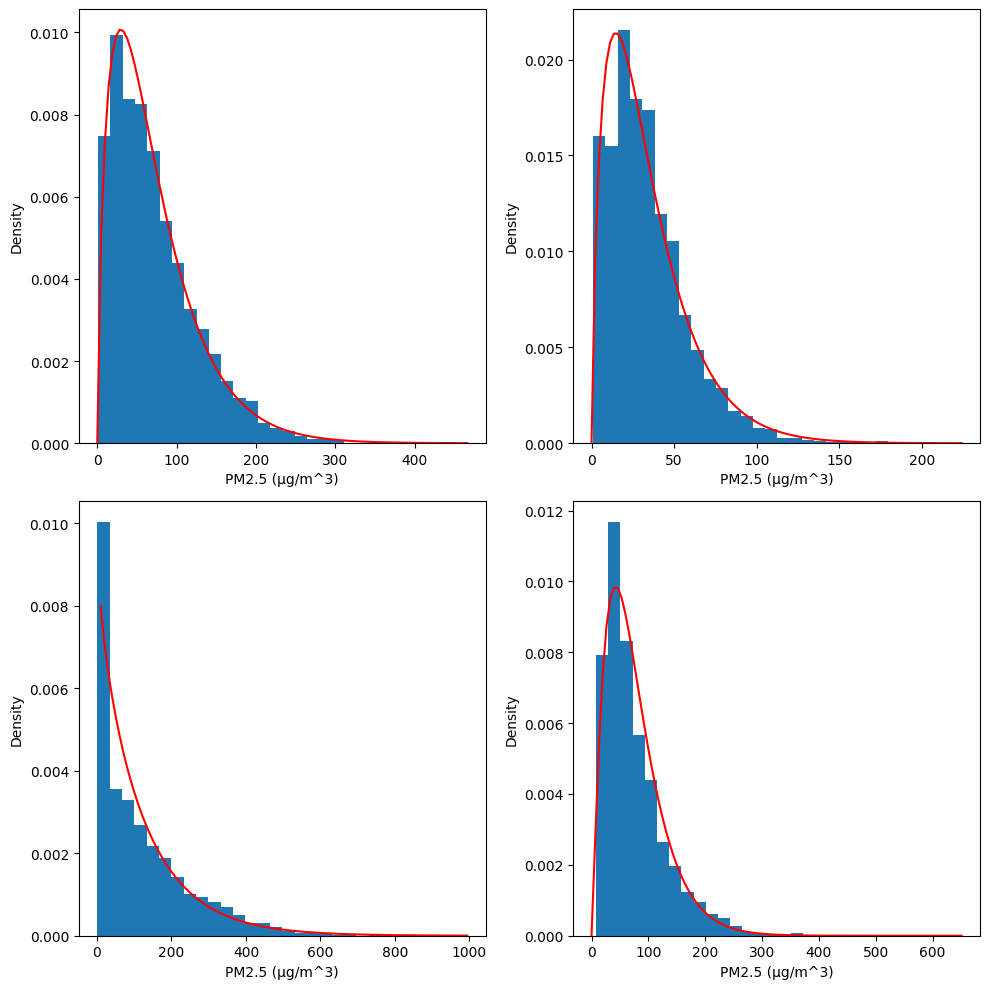

In [283]:
plt.figure(figsize=(10, 10))
j = 0
for i in [summerB, summerS, winterB, winterS]:
    data = i["PM_US Post"]
    alpha = dico2["Alpha"][j]
    beta = dico2["Beta"][j]
    plt.subplot(2,2, j+1)
    plt.hist(data, bins=30, density=True)
    x = np.linspace(0, data.max(), 100)
    plt.plot(x, stats.gamma.pdf(x, alpha, scale=beta), 'r')
    plt.xlabel('PM2.5 (µg/m^3)')
    plt.ylabel('Density')
    j += 1

plt.tight_layout()
plt.plot()

Comments here:


------------------------------------------------------------------------------------------------------

2.2. You have fitted 4 gamma random variables to PM2.5 emissions in Shanghai, Beijing during summer and winter.

* Present the anatytical formulas of the mean and standard deviation of a gamma distribution. Calculate the expected levels and the standard devations of the PM2.5 emissions (in Shanghai, Beijing during summer and winter) relying on the fitted gamma random variables. 
* Calculate the 25%, 50% and 75% percentiles of these gamma distributions.
* Compare your results with the empirical statistics previously computed. Please comment your results.

------------------------------------------------------------------------------------------------------

In [284]:
def gamma_stats(alpha, beta):
    mean = alpha / beta
    std = np.sqrt(alpha) / beta
    return mean, std

# calculate statistics
means = []
stds = []
percentiles = []

for i in range(4):
    alpha, beta = dico2["Alpha"][i], dico2["Beta"][i]
    mean, std = gamma_stats(alpha, beta)
    means.append(mean)
    stds.append(std)
    percentiles.append(stats.gamma.ppf([0.25, 0.5, 0.75], alpha, scale=1/beta))
    
# create table
table = pd.DataFrame({
    'City': ['Beijing', 'Shanghai', 'Beijing', 'Shanghai'],
    'Season': ['Summer', 'Summer', 'Winter', 'Winter'],
    'Mean': means,
    'Standard deviation': stds,
    '25% percentile': [p[0] for p in percentiles],
    '50% percentile': [p[1] for p in percentiles],
    '75% percentile': [p[2] for p in percentiles]
})

print(table)

       City  Season      Mean  Standard deviation  25% percentile  \
0   Beijing  Summer  0.040266            0.030875        0.017652   
1  Shanghai  Summer  0.091266            0.068819        0.040825   
2   Beijing  Winter  0.007217            0.007444        0.001945   
3  Shanghai  Winter  0.066385            0.044255        0.033849   

   50% percentile  75% percentile  
0        0.032708        0.054766  
1        0.074672        0.123886  
2        0.004876        0.010005  
3        0.056852        0.088648  


Comments here:



------------------------------------------------------------------------------------------------------

2.3. The quality of the MLE estimators depends upon many factors. One way to estimate it is to bootstrap the dataset. We will focus here exclusively on PM2.5 emissions in Beijing, during the winter time.

* Bootstrap 1000 times a sample of 6000 daily emissions for Beijing (winter) and plot an histogram of estimated alpha and scale parameters.

* Compute a 5% confidence interval for parameter(s) estimates for the best distribution obtained by MLE. 

* How do you interpret the results? Is the accuracy good?

------------------------------------------------------------------------------------------------------

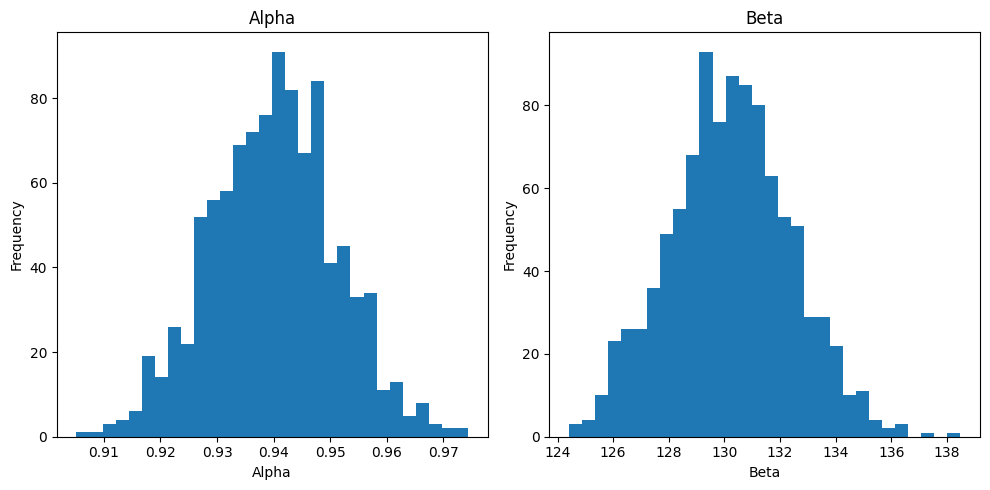

Alpha confidence interval: [0.91795401 0.96146962]
Beta confidence interval: [126.04741725 134.54072748]


In [285]:
# bootstrap
n = 6000
n_bootstrap = 1000
alphas = []
betas = []

for _ in range(n_bootstrap):
    sample = np.random.choice(winterB["PM_US Post"], n)
    alpha, loc, beta = stats.gamma.fit(sample, floc=0)
    alphas.append(alpha)
    betas.append(beta)
    
# plot histograms
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(alphas, bins=30)
plt.title('Alpha')
plt.xlabel('Alpha')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(betas, bins=30)
plt.title('Beta')
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# confidence interval
alpha_ci = np.percentile(alphas, [2.5, 97.5])
beta_ci = np.percentile(betas, [2.5, 97.5])

print(f'Alpha confidence interval: {alpha_ci}')
print(f'Beta confidence interval: {beta_ci}')

Comments here:


## 3. Regression and forecasting 

------------------------------------------------------------------------------------------------------

3.1. In this question, you will determine if PM2.5 emissions levels depends upon weather conditions. We focus
on emissions measured by the US embassy in Beijing, during winter.

Regress PM2.5 emissions in Beijing (season 4) with respect to:
 * DEWP: Dew Point (Celsius Degree)
 * TEMP: Temperature (Celsius Degree)
 * HUMI: Humidity (%)
 * PRES: Pressure (hPa)
 * cbwd: Combined wind direction
 * Iws: Cumulated wind speed (m/s)
 * precipitation: hourly precipitation (mm)

The variable 'cbwd' is categorical. Convert it into dummy variables (0 or 1) with panda.get_dummies. Do not forget to drop one modality of this variable. Remove lines from the dataset with NaN entries.

* Use the OLS() function of the package statsmodels.api to perform the linear regression. 
* Comment your results (goodness of fit, R2, F-stat and T-stats of coefficients)
* Answer this : Does high hourly precipitation (mm) mitigate PM2.5 emissions?

------------------------------------------------------------------------------------------------------

In [286]:
import statsmodels.api as sm
import numpy as np
# We use winterB
dff = pd.get_dummies(winterB, columns=["cbwd"], drop_first=True).astype(float)
dff = dff.dropna(subset=["DEWP", "HUMI", "PRES", "cbwd_NW", "cbwd_SE", "cbwd_cv", "Iws", "precipitation"])

X = dff[["DEWP", "HUMI", "PRES", "cbwd_NW", "cbwd_SE", "cbwd_cv", "Iws", "precipitation"]]
X = sm.add_constant(X)
Y = dff["PM_US Post"]
model = sm.OLS(Y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             PM_US Post   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     900.6
Date:                Tue, 29 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:59:05   Log-Likelihood:                -48571.
No. Observations:                8189   AIC:                         9.716e+04
Df Residuals:                    8180   BIC:                         9.722e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3004.2005    193.141     15.554

Comments here:


------------------------------------------------------------------------------------------------------

3.2. We design a simple auto-regressive model for predicting the PM 2.5 emissions over the next hour, in Beijing, measured at the US embassy (warning, we consider emissions between the 1/1/2012 and 31/12/2015 and during all seasons).

Let us denote by E(t) the emission at time 't'. We an autoregressive model defined as follows:

$$E(t) = \sum_{k=1}^{3} a_k E(t-k) $$

a. We split the dataset into a training set (the first 75% of data included) and a validation set (the remaining 25%).

b.	Estimate this model with statsmodels on the training set. 

c.	Analyze statistics reported by statsmodel.

------------------------------------------------------------------------------------------------------

a_1 = 0.01692146148553751 
a_2 = -0.21459031212578064 
a_3 = 1.158556449629219


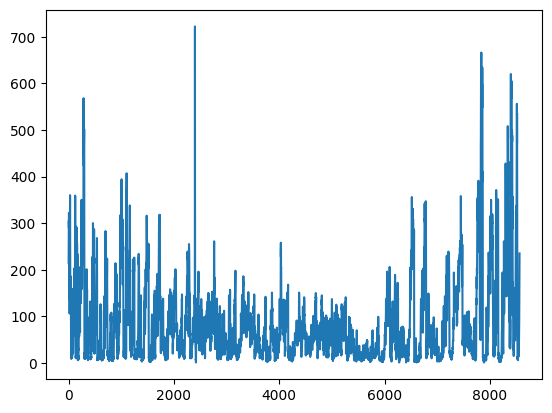

In [295]:
""" from statsmodels.tsa.ar_model import AutoReg

# a
data = dfCleanedUS["PM_US Post"]
dates = pd.to_datetime(data.index, unit='h', origin=pd.Timestamp('2010-01-01 00:00:00'))
data.index = dates
data = data.asfreq('h')
N = len(data)
NTrain = int(0.75 * N)
dataT = data[:NTrain]
dataV = data[NTrain:]

mod = AutoReg(dataT, 3)
mod_fit = mod.fit()

#print(mod_fit.params)
pred = mod_fit.predict()
plt.plot(pred)
plt.show()
 """
data = dfCleanedUS['PM_US Post']
Nt = int(0.75*len(data))
training = data[:Nt].values
validation = data[Nt:].values

# create autoregressive model
X_train, y_train = [], []
for i in range(3, len(training)):
    X_train.append(training[i-3:i])
    y_train.append(training[i])
X_train, y_train = np.array(X_train), np.array(y_train)

X_pred, y_pred = [], []
for i in range(3, len(validation)):
    X_pred.append(validation[i-3:i])
    y_pred.append(validation[i])
X_pred, y_pred = np.array(X_pred), np.array(y_pred)

# linear regression model

# Add a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)
X_pred_sm = sm.add_constant(X_pred)

# Fit the model
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Make predictions
predictions = results.predict(X_pred_sm)

# Align the predictions with the actual values
y_pred = y_pred[:-1]
predictions = predictions[1:]

# print results
print(f'a_1 = {results.params[1]} \na_2 = {results.params[2]} \na_3 = {results.params[3]}')


Comments here:

------------------------------------------------------------------------------------------------------

3.3. Use this model on the test set to forecast the PM2.5 hourly emissions on the test set.

a. Compare on a graph, the forecast to real emissions.

b. Plot the errors of prediction. Are they acceptable? Compute the mean absolute error (MAE) of prediction on the training and test sets.
 
------------------------------------------------------------------------------------------------------

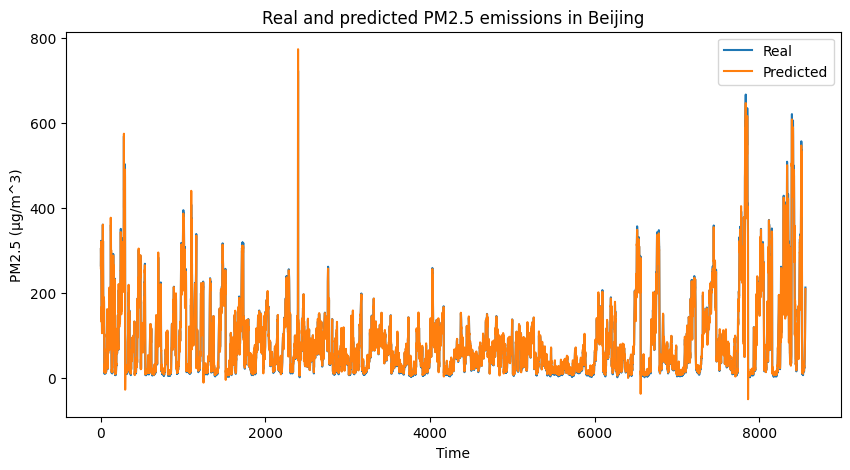

Mean Absolute Error: 3.434099644701844


In [289]:
plt.figure(figsize=(10, 5))
plt.plot(y_pred, label='Real')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('Real and predicted PM2.5 emissions in Beijing')
plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m^3)')
plt.show()

mae = np.mean(np.abs(y_pred - predictions))
print(f'Mean Absolute Error: {mae}')


Comments here:


## 4. Hypothesis tests

------------------------------------------------------------------------------------------------------
4.1. You will compare the average PM2.5 emissions measured at the US embassy in Beijing (PM_US Post_y), during winter with emissions reported by Chinese authorities in Nongzhanguan (PM_Nongzhanguan), a district of Beijing close to the US embassy.

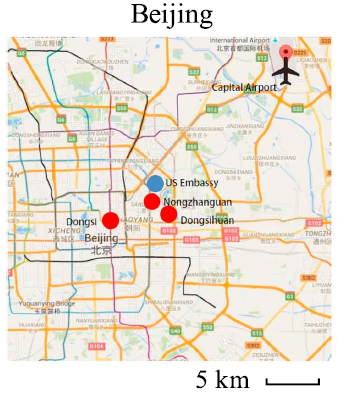


a) Reload the data from 'BeijingPM.csv' file. Keep data from the 1/1/2012 and 31/12/2015 in winter time(season 4). Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Nongzhanguan (PM_Nongzhanguan) and Beijing (PM_US Post), to keep the same number of observations.

------------------------------------------------------------------------------------------------------

In [222]:
# Code here
start_day, start_month, start_year = 1, 1, 2012
end_day, end_month, end_year = 31, 12, 2015
df = pd.read_csv("BeijingPM.csv")

# On retire les données hors de la période temporelle
df = df[(df['year'] >= start_year) & (df['month'] >= start_month) & (df['day'] >= start_day) & (df['year'] <= end_year) & (df['month'] <= end_month) & (df['day'] <= end_day) & (df['season'] == 4)]

df = df.dropna(subset=['PM_US Post', 'PM_Nongzhanguan'])



b) Perfom a  the Stutent's T test to check if the average hourly PM2.5 emissions are the same in Nongzhanguan and at the US embassy. The null hypothesis is

$H_0$: $\mu_{US} = \mu_{Nongzhanguan}$.

Use a confidence level of 5%. Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?


In [223]:
# Code here
XUS = np.mean(df['PM_US Post'])
XN = np.mean(df['PM_Nongzhanguan'])
SUS = np.std(df['PM_US Post'],ddof=1)
SN = np.std(df['PM_Nongzhanguan'], ddof=1)
n = df.shape[0]
Spool = np.sqrt(((n-1)*SUS**2 + (n-1)*SN**2)/(n+n-2))

Tx = (XUS-XN)/(Spool*np.sqrt(1/n+1/n))

alpha = 0.05

pval = 2*stats.t.cdf(-np.abs(Tx), df=n+n-2)

pvalpourcent = pval*100


print("p-value : ", pvalpourcent)


p-value :  0.025164973246048147


Les deux variables aléatoires suivent une normale

Les deux variables aléatoires sont indépendantes

$H_0$: $\mu_{US} - \mu_{Nongzhanguan}$ = 0.

$H_0$: $\mu_{US} - \mu_{Nongzhanguan}$ != 0.



c) Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 

Comment here:

d) Apply the Wilcoxon's test to distributions of the hourly PM2.5 emissions in Nongzhanguan and at the US embassy. What can you conclude ?

In [224]:
_, pvalWilc = stats.mannwhitneyu(df['PM_Nongzhanguan'], df['PM_US Post'], alternative="two-sided")
pvalWilcPourcent = pvalWilc * 100
print("Wilcoxon's test result : ", pvalWilcPourcent)


Wilcoxon's test result :  0.007413938692665403


Comment here:

